# Import Libraries

In [1]:
pip install --upgrade nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 31.5 MB/s eta 0:00:0000:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [57]:
import re
import emoji
import pandas as pd 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import contractions
import warnings
warnings.filterwarnings("ignore")

In [52]:
# Download NLTK resources if not already done
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Read the dataset 

In [5]:
column_names = ["target", "id", "date", "flag", "user", "text"]

# Read the CSV file with specified column names
df = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", 
                 encoding="ISO-8859-1", names=column_names)

In [6]:
df.head (10)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


# Data Cleaning and preprocessing 

### we only need two columns "target" and "text"

In [7]:
df=df[['text','target']]
df.sample(5)

,text,target
549972,La exam tomorrow. I am not exited at all. Eww,0
1212089,"OMFG, @new moon; LOOVE it ! im boucingg off t...",4
1451717,@auditiondanny that game was reediculous. i'm ...,4
71044,I just dropped off my baby at grade school for...,0
331590,@HailtoTheKing no online I can't pick a favor...,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1600000 non-null  object
 1   target  1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [9]:
df.shape

(1600000, 2)

In [10]:
df.isna().sum()

text      0
target    0
dtype: int64

In [11]:
df.duplicated().sum()

16309

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(1583691, 2)

In [14]:
df['target'].unique()

array([0, 4])

In [15]:
df['target'].value_counts()

target
4    793506
0    790185
Name: count, dtype: int64

### As we know in this data set that the positive is "4" and the negative is "0"

In [16]:
# making 1 for positive instead of 4
df['target'][df['target']==4]=1

In [17]:
df.sample(5)

,text,target
1420247,"@derekbennion congrats, guys!! puppies are so ...",1
853143,"@redskye9 need not to look for the source, I j...",1
75286,5:16 AM and I have to get up.,0
1029427,@coldplay http://twitpic.com/6192h - Thanks fo...,1
1248308,Leaving CA Organics. Just had a delicious chic...,1


In [18]:
# Making Text Lowercase
df['text']=df['text'].str.lower()

In [19]:
df.sample(5)

,text,target
1243307,@jammers20 hope it will be worth it.. mind you...,1
1072581,@miss_cely heeeyy! llegaste! ya has visto un j...,1
1492620,@_charlotteex_ two celebs follow me! just othe...,1
1201445,@shaundiviney awww good luck sorry i don't ha...,1
1360154,@danger534 yeah! i can't stay. i'm yawning all...,1


## Remove URLs

In [20]:
# Remove URLs
df['text'] = df['text'].replace(r'http\S+|www\S+|https\S+', '', regex=True)


## Remove Mentions and Hashtags

In [21]:
# Remove Mentions and Hashtags
df['text'] = df['text'].replace(r'@\w+|#\w+', '', regex=True)


## Remove Special Characters and Punctuation

In [22]:
# Remove Special Characters and Punctuation
df['text'] = df['text'].replace(r'[^A-Za-z0-9\s]', '', regex=True)


## Remove Numbers

In [23]:
# Remove Numbers
df['text'] = df['text'].replace(r'\d+', '', regex=True)


## Function to expand contractions in text

In [24]:
# Function to expand contractions in text

def expand_contractions(text):
    return contractions.fix(text)


df['text'] = df['text'].apply(expand_contractions)

## Remove Stopwords

In [25]:
# Remove Stopwords
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


## Lemmatization


In [26]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


## Handling Emoticons and Emojis


In [27]:
# Handling Emoticons and Emojis
df['text'] = df['text'].apply(lambda x: emoji.demojize(x))


## Remove Repeated Characters Reduce repeated characters, such as "sooooo happy" to "so happy."


In [28]:
#Remove Repeated Characters Reduce repeated characters, such as "sooooo happy" to "so happy."
df['text'] = df['text'].apply(lambda x: re.sub(r'(.)\1+', r'\1\1', x))


In [29]:
df.sample(20)

,text,target
939464,looking place good tortilla finished let know ...,1
930655,wb al bby,1
822817,aww cute,1
1261303,parking city stressful b expensive least get f...,1
135638,bummed cash strapped situation forced grounded...,0
1086529,awe thanks sugarim glad b sum top,1
1300015,thanks everyone left birthday love mad sarcast...,1
232010,mm truely miss even though happened everything...,0
408475,today suck hope get better hate way thing,0
373235,work supervising online student come campus te...,0


In [30]:
df['tweet_length'] = df['text'].apply(len)

In [31]:
df['tweet_length'].value_counts()

tweet_length
23     26948
21     26869
24     26741
26     26686
20     26600
       ...  
135        2
139        1
141        1
168        1
172        1
Name: count, Length: 142, dtype: int64

In [32]:
df.sample(10)

,text,target,tweet_length
550461,sigh heartbroken heart nyc horrid timing,0,40
758259,got cold glass coke ampamp chocolate muffin x,0,45
6370,shitty kind day due local council bureaucracy ...,0,101
678607,live oldest house lathrup never forget mansion,0,46
822227,everythings coming millhouse harry potter satu...,1,61
664842,okso wrong thought worst thing spill work whip...,0,90
298403,finally got home day office migraine start,0,42
764764,want mow lawn work website tonight want ride f...,0,59
873703,really want alcohol nite skint really bad time...,1,87
434000,thanks going ville tomorrowit without,0,37


In [33]:
df.isna().sum()

text            0
target          0
tweet_length    0
dtype: int64

In [34]:
df.shape

(1583691, 3)

In [35]:
df = df[df['tweet_length'] > 0]

In [36]:
df.shape

(1574929, 3)

In [37]:
df.duplicated().sum()

102747

In [38]:
df.drop_duplicates(inplace=True)

In [39]:
df.shape

(1472182, 3)

# EDA

In [40]:
df.describe()

,target,tweet_length
count,1.472182e+06,1.472182e+06
mean,4.965962e-01,4.300489e+01
std,4.999886e-01,2.234706e+01
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,2.500000e+01
50%,0.000000e+00,4.000000e+01
75%,1.000000e+00,5.900000e+01
max,1.000000e+00,1.720000e+02


In [41]:
# Word Frequency Distribution
def word_frequency(df, text_column, num_words=20):
    all_words = ' '.join(df[text_column]).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(num_words)

In [42]:
word_frequency(df, 'text', num_words=20)

[('day', 98839),
 ('going', 86852),
 ('good', 83752),
 ('get', 83262),
 ('like', 77307),
 ('go', 75147),
 ('got', 68425),
 ('love', 66160),
 ('today', 64353),
 ('cannot', 63359),
 ('time', 62570),
 ('work', 62300),
 ('want', 61621),
 ('know', 54879),
 ('one', 54793),
 ('back', 54203),
 ('lol', 54035),
 ('really', 48949),
 ('see', 45191),
 ('well', 43640)]

In [43]:
# Plotting Word Clouds 
def plot_wordcloud(df, text_column):
    all_words = ' '.join(df[text_column])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


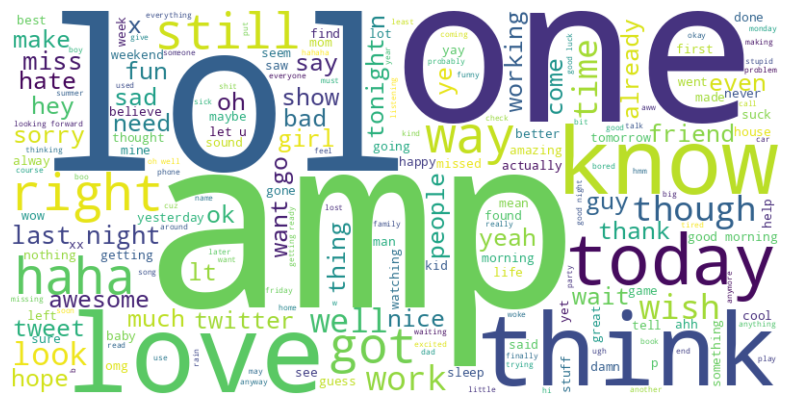

In [44]:
plot_wordcloud(df, 'text') 


In [45]:
# Tweet Length Distribution Plot
def plot_tweet_lengths(df):
    plt.figure(figsize=(8, 6))
    sns.histplot(df['tweet_length'], bins=20, kde=True)
    plt.title('Distribution of Tweet Lengths')
    plt.show()


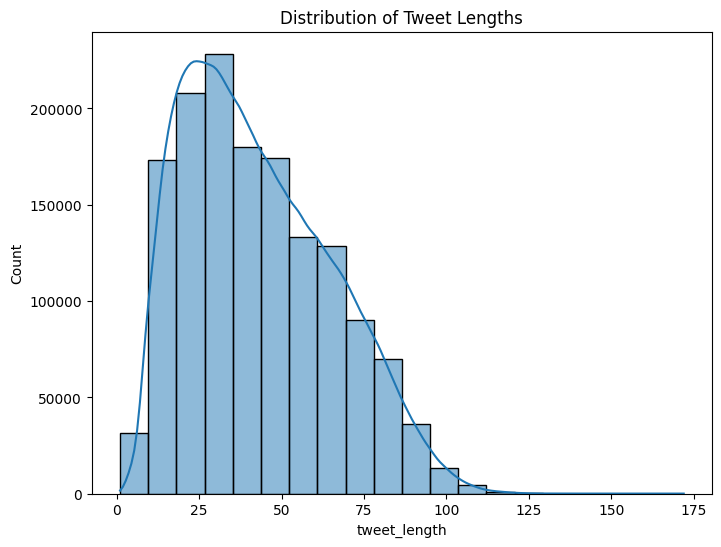

In [46]:
plot_tweet_lengths(df) 

In [47]:
#  Plotting Sentiment Distribution
def plot_sentiment_distribution(df, sentiment_column):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=sentiment_column, data=df)
    plt.title('Sentiment Distribution')
    plt.show()

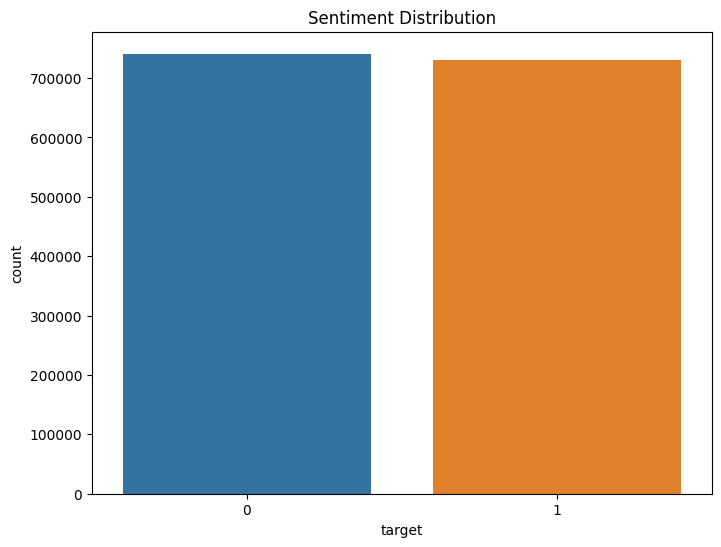

In [48]:
plot_sentiment_distribution(df, 'target')

In [49]:
df.sample(20)

,text,target,tweet_length
1006721,glad plasticine sniffer world,1,29
283115,back heree troed calling want talk,0,34
692088,miss melissa want cut internet spending way mu...,0,68
520074,like martin xd want th twitter bill blog eyeli...,0,73
229916,sorry anti miley friend yes break justin back,0,45
22233,probably mouse noisy bugger sound like rat cat...,0,80
465078,feel sick tuna sandwich done something,0,38
185571,feel like cut mine stopped growing spite,0,40
835148,barbecuing terrase lovely weather,1,33
851911,freezing even though heater slept electric bla...,1,90


## Tokenization


In [58]:
tokenizer = RegexpTokenizer(r'\w+')
df['text'] = df['text'].apply(tokenizer.tokenize)

In [59]:
df.sample(20)

,text,target,tweet_length
1086405,"[lmaoo, thanks, haha]",1,17
96247,"[internet, hope, night, went, well]",0,29
1299535,"[early, dye, mom, hair, layed, bible, pen, pap...",1,91
1533480,"[feel, pain, leaving, tverse, write, content, ...",1,55
402116,"[might, stay, tt, wbsite, tonight, know, wheth...",0,64
196051,"[dammit, cannot, seem, make, icon, atm, like]",0,37
283420,"[course, get, one, damn, day, week, high, goin...",0,44
566117,"[ugh, sorry, blame, making, effort, stuff, she...",0,47
842903,"[pues, vea, una, peli]",1,17
1009223,"[wow, thank, one, email, yday, check]",1,30


In [60]:
df.to_csv('clean_data.csv', index=False)

# Word embedding

# Model

# Evaluation

# save the model 